In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

In [5]:
# --- SECTION 1: SETUP AND DATA LOADING ---

# KEEP THESE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ADD THESE LIBRARIES FOR SUPERVISED LEARNING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve



<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

In [6]:
#Loading the dataset
df = pd.read_csv("/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")

print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 10000


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:

# --- Basic Inspection (KEEP AND ENHANCE) ---
print("--- Initial Data Overview ---")
print(f"Dataset shape: {df.shape}")
print("\n--- Column Info and Null Check ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())



--- Initial Data Overview ---
Dataset shape: (10000, 12)

--- Column Info and Null Check ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB

--- Descriptive Statistics ---
        customer_id  credit_score           a

In [8]:
# IMPORTANT: Remove the unused customer_id column early on
df = df.drop('customer_id', axis=1, errors='ignore') # errors='ignore' prevents error if it's already gone

print("\n--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
   credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0  



--- EDA: Analyzing Churn Distribution ---


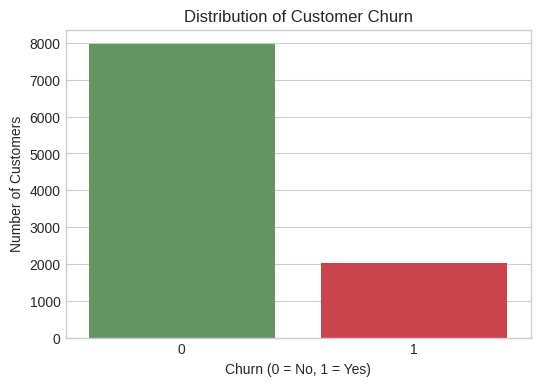


--- EDA: Categorical Features vs. Churn ---


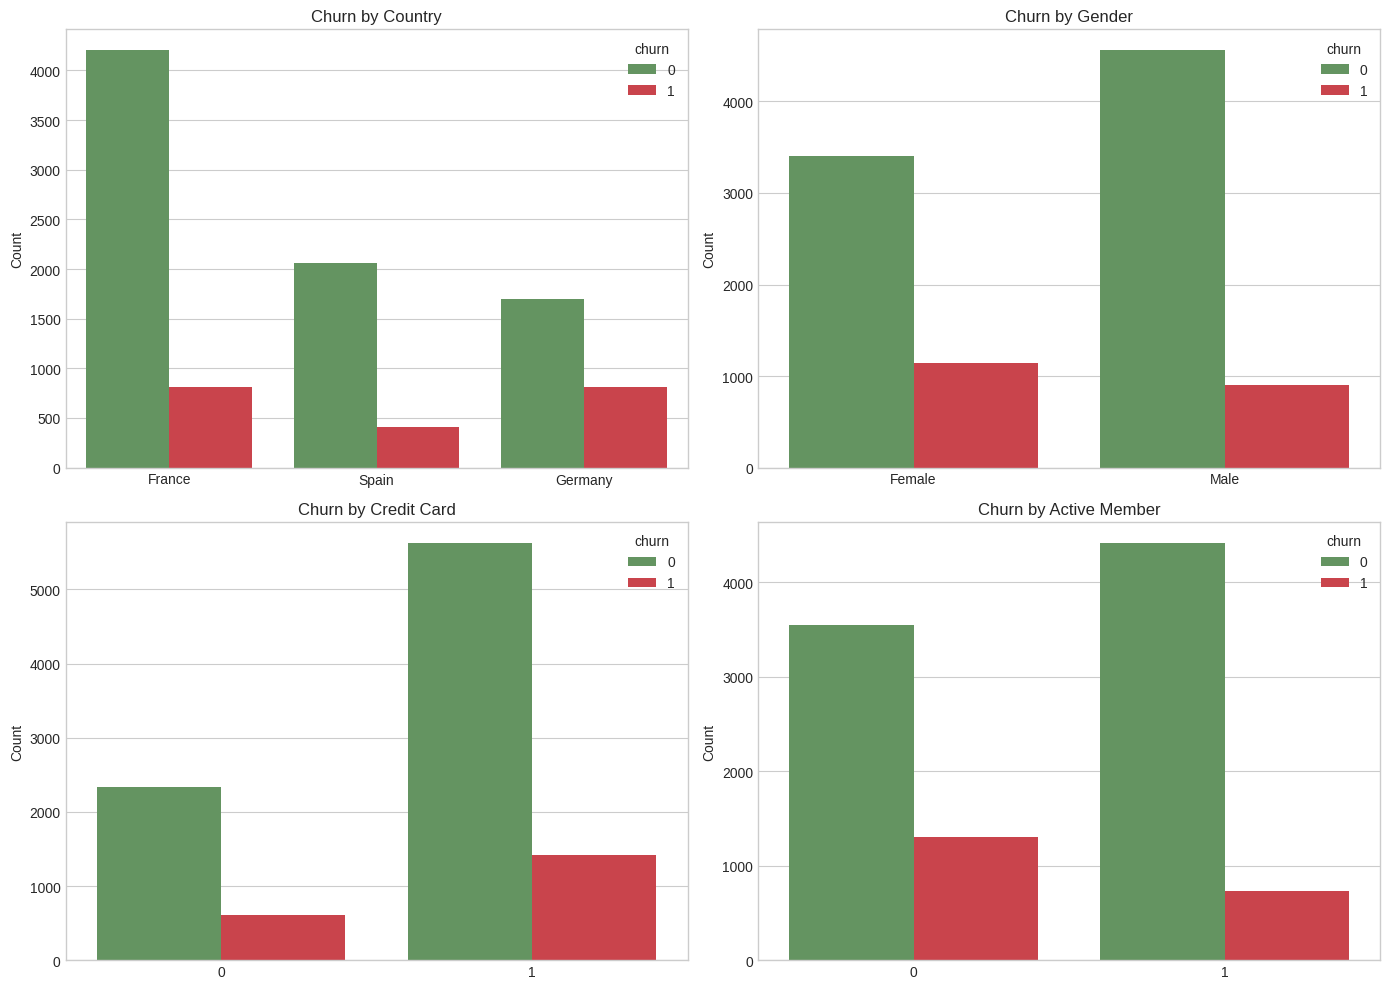


--- EDA: Numerical Features vs. Churn ---


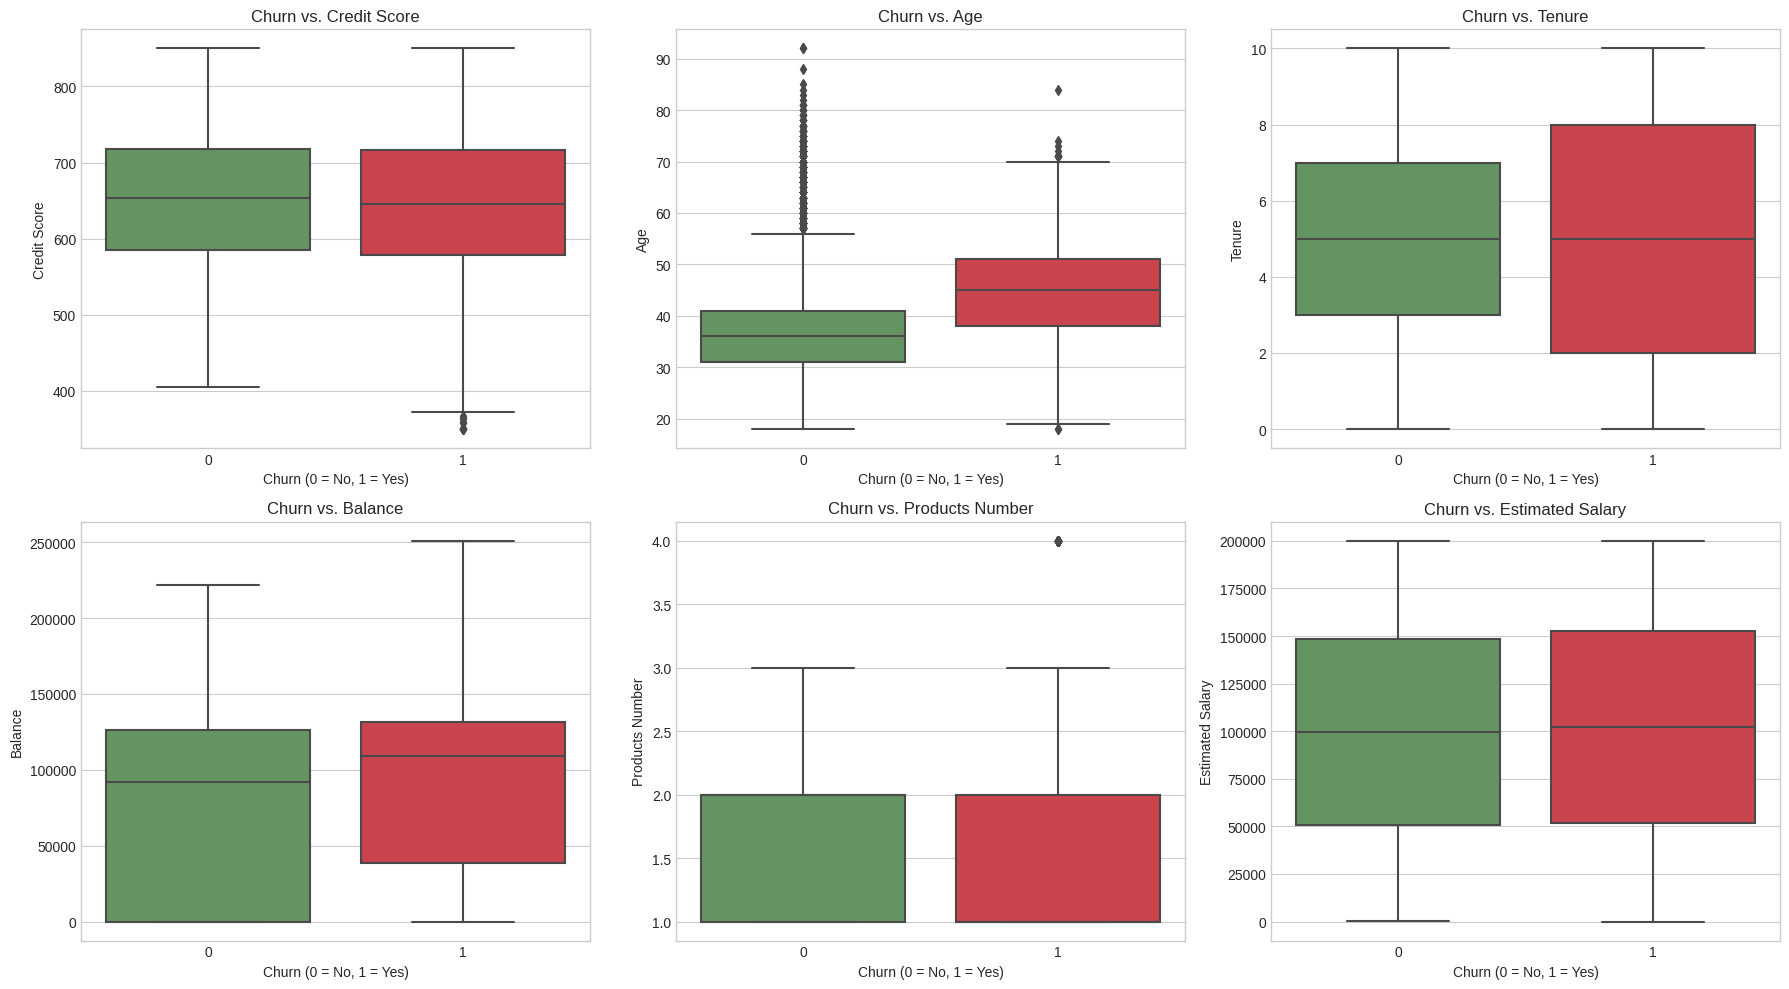

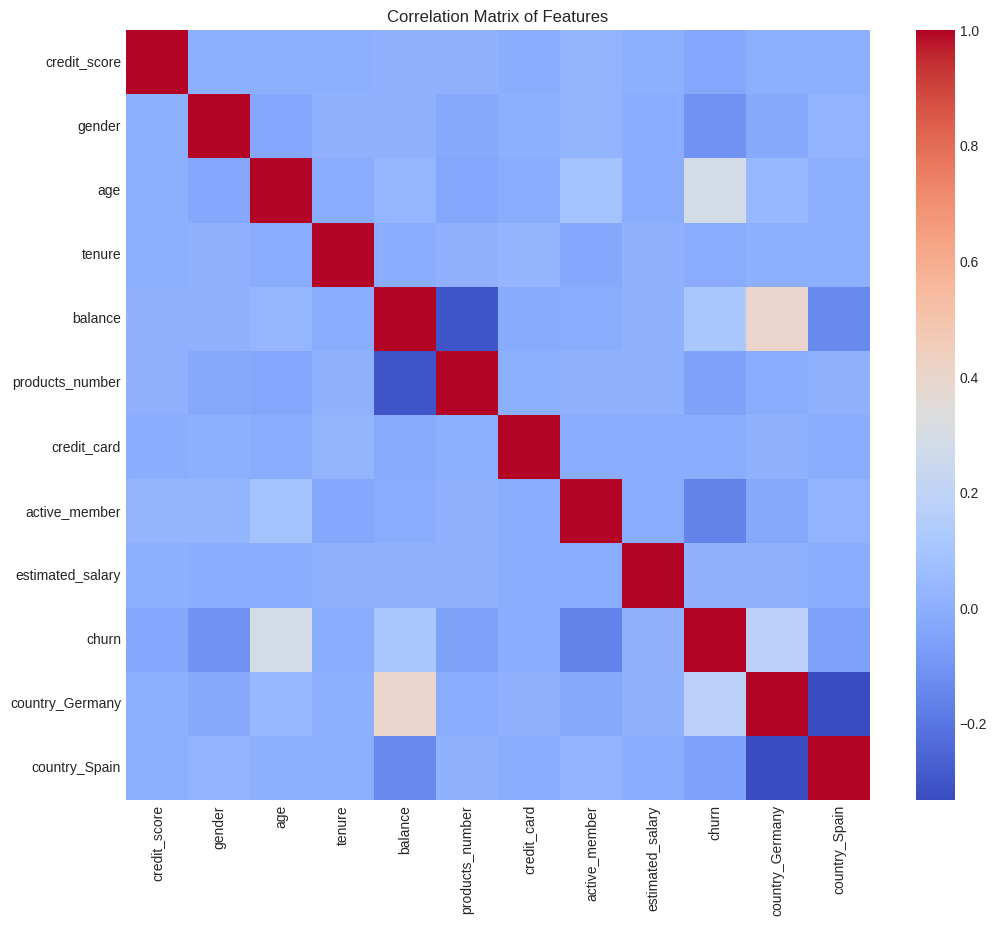

In [9]:
# --- SECTION 2: EXPLORATORY DATA ANALYSIS (EDA) ---
# GOAL: Understand the characteristics of customers who churn vs. those who stay.

print("\n--- EDA: Analyzing Churn Distribution ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette=['#5D9C59', '#DF2E38'])
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

# --- EDA: Categorical Features vs. Churn ---
print("\n--- EDA: Categorical Features vs. Churn ---")
categorical_features = ['country', 'gender', 'credit_card', 'active_member']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='churn', data=df, ax=axes[i], palette=['#5D9C59', '#DF2E38'])
    axes[i].set_title(f'Churn by {col.replace("_", " ").title()}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

# --- EDA: Numerical Features vs. Churn ---
print("\n--- EDA: Numerical Features vs. Churn ---")
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x='churn', y=col, data=df, ax=axes[i], palette=['#5D9C59', '#DF2E38'])
    axes[i].set_title(f'Churn vs. {col.replace("_", " ").title()}')
    axes[i].set_xlabel('Churn (0 = No, 1 = Yes)')
    axes[i].set_ylabel(col.replace("_", " ").title())
plt.tight_layout()
plt.show()

# --- EDA: Correlation Heatmap ---
# We need to encode categorical variables to do a proper correlation analysis
df_corr = df.copy()
df_corr['gender'] = df_corr['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_corr = pd.get_dummies(df_corr, columns=['country'], drop_first=True)

plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

Training set shape: (8000, 10)
Test set shape: (2000, 10)

--- Training the Random Forest model... ---
Model training complete.

--- Evaluating model performance on the test set ---

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000


Confusion Matrix:


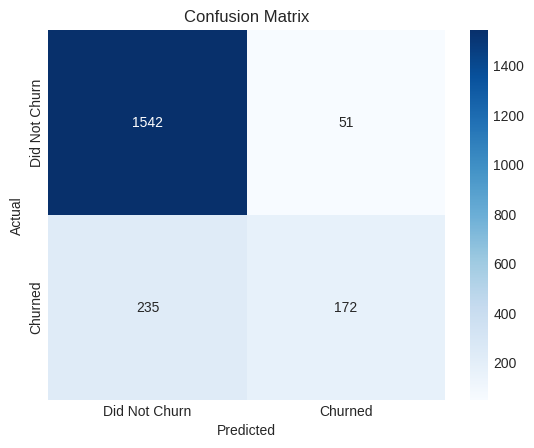


ROC AUC Score: 0.8510


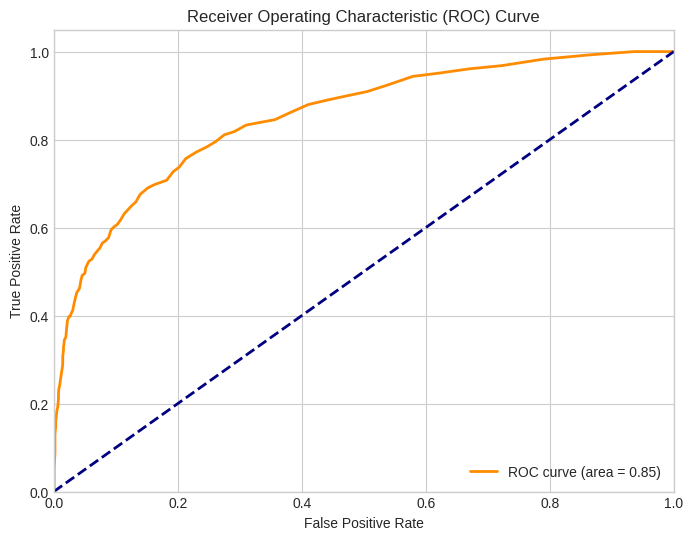

In [10]:
# --- SECTION 3: DATA PREPROCESSING & MODELING PIPELINE ---
# GOAL: Prepare the data and build our predictive models in a structured way.

# Define features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Identify categorical and numerical features
# Note: We treat binary features with 0/1 as numerical for simplicity in scaling
categorical_features = ['country', 'gender']
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'credit_card', 'active_member']

# Create preprocessing pipelines for numerical and categorical features
# This is a robust way to handle data preparation
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object using ColumnTransformer
# This applies different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)


# --- Split the data into training and testing sets ---
# We use stratify=y to ensure the proportion of churn is the same in train and test sets
# This is crucial for imbalanced datasets!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


# --- Build the Model ---
# We will start with a Random Forest Classifier
# We use a Pipeline to chain the preprocessing and the model together
# This prevents data leakage and makes the code clean
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced')) # 'balanced' helps with imbalanced data
])

# --- Train the model ---
print("\n--- Training the Random Forest model... ---")
model.fit(X_train, y_train)
print("Model training complete.")


# --- SECTION 4: MODEL EVALUATION ---
# GOAL: Evaluate how well our model performs on unseen test data.

print("\n--- Evaluating model performance on the test set ---")
# Get predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilities for the 'churn' class

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Churn', 'Churned'], yticklabels=['Did Not Churn', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# --- ROC AUC Score ---
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [11]:
# --- SECTION 5: BUSINESS IMPACT ANALYSIS ---
# GOAL: Translate model predictions into a quantifiable financial metric.

print("\n--- Phase 2: Quantifying Business Impact ---")

# We already have y_prob from the evaluation section, which contains the churn probabilities.
# Let's create a results DataFrame to analyze the output.
results_df = X_test.copy()
results_df['actual_churn'] = y_test
results_df['churn_probability'] = y_prob

# --- Calculate Annual Revenue for Each Customer ---
# Using the formula: (balance * 0.02) + (products_number * 50) + (credit_card * 100)
# Note: We are calculating this for everyone in the test set to understand the value of each customer.
results_df['annual_revenue'] = (
    results_df['balance'] * 0.02 +
    results_df['products_number'] * 50 +
    results_df['credit_card'] * 100
)

# --- Identify High-Risk Customers and Calculate Revenue at Risk ---
# We'll set a risk threshold. Anyone with a churn probability above this is "high-risk".
# A 50% threshold is a common starting point.
risk_threshold = 0.5
high_risk_customers = results_df[results_df['churn_probability'] > risk_threshold]

# Calculate the total revenue from this high-risk group
total_revenue_at_risk = high_risk_customers['annual_revenue'].sum()

# --- Present the Findings ---
print(f"\nTotal customers in the test set: {len(X_test)}")
print(f"Number of customers identified as 'high-risk' (probability > {risk_threshold*100}%): {len(high_risk_customers)}")
print(f"Total Annual Revenue at Risk from these customers: ${total_revenue_at_risk:,.2f}")

# You can also show the value of customers the model correctly identified as churners
correctly_identified_churners = results_df[(results_df['actual_churn'] == 1) & (results_df['churn_probability'] > risk_threshold)]
revenue_saved_by_acting = correctly_identified_churners['annual_revenue'].sum()
print(f"\nOf the customers who actually churned, our model identified {len(correctly_identified_churners)}.")
print(f"Potential revenue that could be targeted for retention: ${revenue_saved_by_acting:,.2f}")


# --- Show the most valuable customers at risk ---
print("\n--- Top 5 Most Valuable Customers at High Risk of Churn ---")
# Sort by revenue descending to see who the bank should be most worried about
valuable_high_risk_customers = high_risk_customers.sort_values(by='annual_revenue', ascending=False)
print(valuable_high_risk_customers[['age', 'country', 'balance', 'annual_revenue', 'churn_probability']].head())



--- Phase 2: Quantifying Business Impact ---

Total customers in the test set: 2000
Number of customers identified as 'high-risk' (probability > 50.0%): 223
Total Annual Revenue at Risk from these customers: $453,845.42

Of the customers who actually churned, our model identified 172.
Potential revenue that could be targeted for retention: $348,090.28

--- Top 5 Most Valuable Customers at High Risk of Churn ---
      age country    balance  annual_revenue  churn_probability
2092   38   Spain  250898.09       5167.9618               0.70
4784   53   Spain  187602.18       3902.0436               0.69
8897   51  France  186825.57       3886.5114               0.51
6441   45  France  178827.79       3726.5558               0.67
1862   44  France  175303.06       3656.0612               0.57


In [12]:
# --- SECTION 6: MODEL EXPLAINABILITY WITH SHAP ---
# GOAL: Understand WHY our model makes certain predictions. This moves us from a "black box" to an explainable model.

# First, we need to install the shap library
try:
    import shap
except ImportError:
    print("Installing SHAP library...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "shap"])
    import shap

In [13]:


print("\n--- Phase 3: Generating Model Explanations with SHAP ---")

# --- 1. Prepare data and model for SHAP ---

# SHAP needs the actual trained model, not the whole pipeline
# We access it using .named_steps
classifier = model.named_steps['classifier']

# SHAP needs the data to be in a numerical format, so we use the preprocessor from our pipeline
# We also need to get the correct feature names after one-hot encoding
preprocessor = model.named_steps['preprocessor']
transformed_X_train = preprocessor.fit_transform(X_train)
transformed_X_test = preprocessor.transform(X_test)

# Getting the feature names after transformation is a bit tricky but crucial
# It ensures our plots have meaningful labels
feature_names = preprocessor.get_feature_names_out()

# Convert the transformed data (which is a sparse matrix or numpy array) back to a pandas DataFrame with correct columns
transformed_X_test_df = pd.DataFrame(transformed_X_test, columns=feature_names)
# --- 2. Calculate SHAP Values ---

print("\nCalculating SHAP values... (this may take a moment)")
# We use a TreeExplainer because our model is a Random Forest (a tree-based model)
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(transformed_X_test_df)
print("SHAP calculation complete.")





--- Phase 3: Generating Model Explanations with SHAP ---

Calculating SHAP values... (this may take a moment)
SHAP calculation complete.



--- SHAP Summary Plot: Global Feature Importance ---
This plot shows the most significant variables in predicting churn.


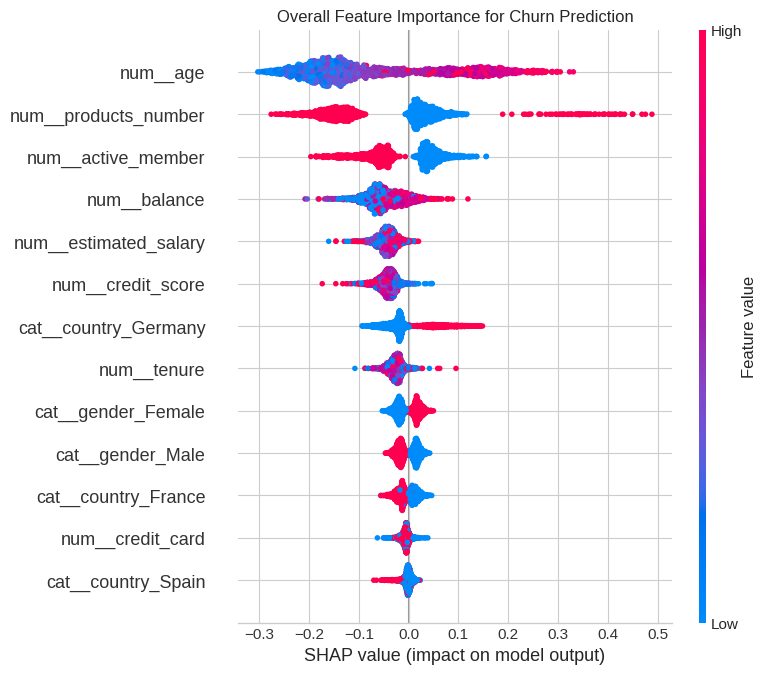

In [14]:
# --- 3. Global Feature Importance (Summary Plot) ---
# This plot shows us which features are most important OVERALL and their impact.
print("\n--- SHAP Summary Plot: Global Feature Importance ---")
print("This plot shows the most significant variables in predicting churn.")
shap.summary_plot(
    shap_values[1], # Use index 1 for the "churn" class
    transformed_X_test_df,
    show=False
)
plt.title("Overall Feature Importance for Churn Prediction")
plt.show()




--- In-Depth Analysis of High-Risk Customer #2092 ---

Customer Profile:
-----------------
  Country: Spain
  Age: 38
  Gender: Male
  Tenure: 3 years
  Balance: $250,898.09
  Number of Products: 3
  Has Credit Card: No
  Is Active Member: Yes

Business Analytics:
-------------------
  Estimated Annual Revenue for Bank: $5,167.96
  Predicted Churn Probability: 70.00%
-------------------

SHAP Force Plot: Explaining the prediction for Customer #2092


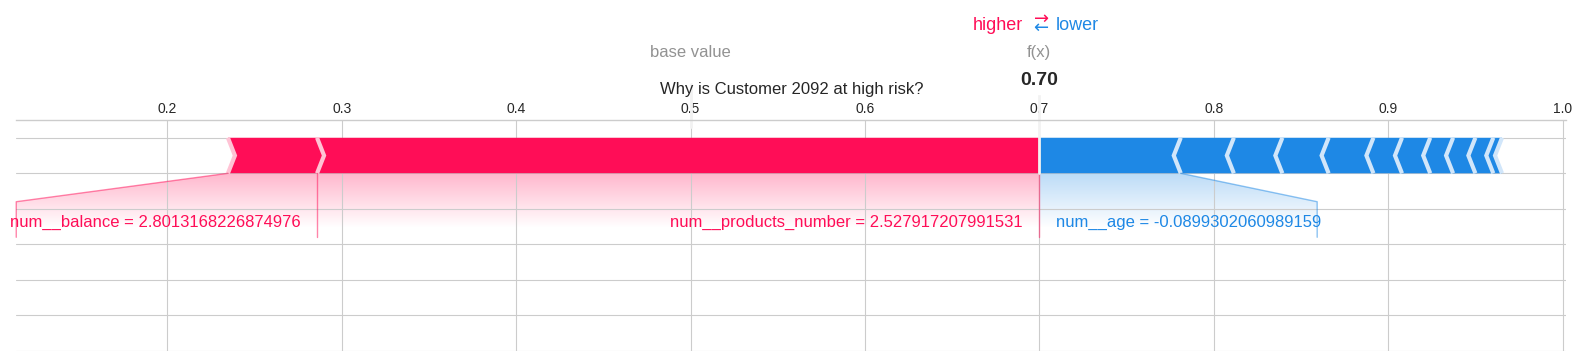

In [17]:
# --- 4. Individual Prediction Explanation (Force Plot) ---
# This is the most powerful part: explaining a single prediction.
# Let's find our most valuable customer who is at high risk.
try:
    # This line might fail if you haven't run the Phase 2 code in the same session
    # We created 'valuable_high_risk_customers' in the previous step
    most_valuable_risk_customer_index = valuable_high_risk_customers.index[0]

    # Find the corresponding row number in the original X_test to use for SHAP
    customer_row_index = X_test.index.get_loc(most_valuable_risk_customer_index)

    print(f"\n--- In-Depth Analysis of High-Risk Customer #{most_valuable_risk_customer_index} ---")

    # --- ADDED: Display the full profile of this customer ---
    # We retrieve the original, human-readable data from X_test before it was scaled or encoded.
    customer_profile = X_test.loc[most_valuable_risk_customer_index]

    # We also get the calculated metrics for this customer from our results_df
    customer_analytics = results_df.loc[most_valuable_risk_customer_index]

    print("\nCustomer Profile:")
    print("-----------------")
    print(f"  Country: {customer_profile['country']}")
    print(f"  Age: {customer_profile['age']}")
    print(f"  Gender: {customer_profile['gender']}")
    print(f"  Tenure: {customer_profile['tenure']} years")
    print(f"  Balance: ${customer_profile['balance']:,.2f}")
    print(f"  Number of Products: {customer_profile['products_number']}")
    print(f"  Has Credit Card: {'Yes' if customer_profile['credit_card'] == 1 else 'No'}")
    print(f"  Is Active Member: {'Yes' if customer_profile['active_member'] == 1 else 'No'}")

    print("\nBusiness Analytics:")
    print("-------------------")
    print(f"  Estimated Annual Revenue for Bank: ${customer_analytics['annual_revenue']:,.2f}")
    print(f"  Predicted Churn Probability: {customer_analytics['churn_probability']:.2%}")
    print("-------------------\n")
    # --- END OF ADDED SECTION ---

    print(f"SHAP Force Plot: Explaining the prediction for Customer #{most_valuable_risk_customer_index}")

    # Initialize javascript for better plotting in notebooks
    shap.initjs()

    # Create the force plot
    force_plot = shap.force_plot(
        explainer.expected_value[1], # The baseline prediction for the "churn" class
        shap_values[1][customer_row_index,:], # The SHAP values for this specific customer
        transformed_X_test_df.iloc[customer_row_index,:], # The feature values for this customer
        matplotlib=True,
        show=False
    )
    plt.title(f"Why is Customer {most_valuable_risk_customer_index} at high risk?")
    plt.show()

except NameError:
    print("\nCould not generate individual force plot because 'valuable_high_risk_customers' was not found.")
    print("Please make sure you have run the Phase 2 code first to identify this customer.")

except Exception as e:
    print(f"\nAn error occurred while generating the individual customer analysis: {e}")


--- Building and Training an XGBoost Classifier ---
Calculated scale_pos_weight for XGBoost: 3.91

Training the XGBoost model...
Model training complete.

--- Evaluating XGBoost model performance on the test set ---

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.56      0.64      0.60       407

    accuracy                           0.83      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.83      0.83      2000


XGBoost Confusion Matrix:


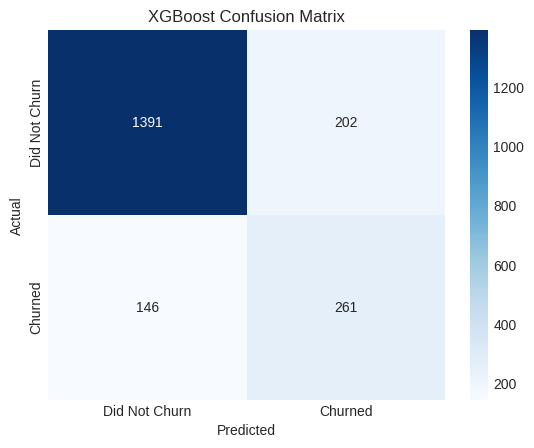


--- Model Performance Comparison ---
Random Forest ROC AUC Score: 0.8510
XGBoost ROC AUC Score:       0.8330

Conclusion: The original Random Forest model performs better or equally well. We will stick with it.


In [19]:
# --- SECTION 5: ADVANCED MODELING WITH XGBOOST ---
# GOAL: To see if a more powerful model can improve upon our baseline performance.

# First, we need to install the xgboost library
try:
    import xgboost as xgb
except ImportError:
    print("Installing XGBoost library...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    import xgboost as xgb


print("\n--- Building and Training an XGBoost Classifier ---")

# We will use the same robust pipeline structure
# This ensures a fair, apples-to-apples comparison with our Random Forest model
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])


# --- Handle Class Imbalance for XGBoost ---
# Unlike Scikit-learn's RandomForest, XGBoost has a specific parameter for this.
# We calculate a 'scale_pos_weight' which is the ratio of negative to positive samples.
# This tells the model to pay more attention to the minority class (churners).
churn_counts = y_train.value_counts()
scale_pos_weight = churn_counts[0] / churn_counts[1]
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight:.2f}")

# We now redefine the model with this parameter
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(random_state=42,
                                     use_label_encoder=False,
                                     eval_metric='logloss',
                                     scale_pos_weight=scale_pos_weight)) # Add the imbalance handler
])

# --- Train the XGBoost model ---
print("\nTraining the XGBoost model...")
xgb_model.fit(X_train, y_train)
print("Model training complete.")


# --- Evaluate the XGBoost Model ---
print("\n--- Evaluating XGBoost model performance on the test set ---")
# Get predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# --- Classification Report ---
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# --- Confusion Matrix ---
print("\nXGBoost Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Churn', 'Churned'], yticklabels=['Did Not Churn', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('XGBoost Confusion Matrix')
plt.show()

# --- ROC AUC Score Comparison ---
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("\n--- Model Performance Comparison ---")
print(f"Random Forest ROC AUC Score: {roc_auc:.4f}") # 'roc_auc' is from our previous model's evaluation
print(f"XGBoost ROC AUC Score:       {roc_auc_xgb:.4f}")

if roc_auc_xgb > roc_auc:
    print("\nConclusion: XGBoost provides a better predictive performance. We will proceed with this model.")
    # IMPORTANT: If XGBoost is better, we must overwrite the old model objects
    # so the rest of the notebook (Business Impact, SHAP) uses the champion model.
    model = xgb_model
    y_pred = y_pred_xgb
    y_prob = y_prob_xgb
    roc_auc = roc_auc_xgb # Update the main roc_auc variable
else:
    print("\nConclusion: The original Random Forest model performs better or equally well. We will stick with it.")